In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random

df = pd.read_csv('loan_cleaned_data_final.csv' , encoding='latin-1')
df.head()


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,10.65,162.87,24.000,0,27.65,0,1,3,0,13648,83.7,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30.000,1,1.00,0,5,3,0,1687,9.4,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,0,8.72,0,2,2,0,2956,98.5,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,7.90,156.46,36.000,0,11.20,0,3,9,0,7963,28.3,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,18.64,109.43,48.000,0,5.35,0,2,4,0,8221,87.5,4,1,1,0,0,0,1,0


In [2]:
y = df['loan_status']
X = df.drop(['loan_status'],1)

In [3]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,10.65,162.87,24.000,27.65,0,1,3,0,13648,83.7,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30.000,1.00,0,5,3,0,1687,9.4,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,8.72,0,2,2,0,2956,98.5,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,7.90,156.46,36.000,11.20,0,3,9,0,7963,28.3,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,18.64,109.43,48.000,5.35,0,2,4,0,8221,87.5,4,1,1,0,0,0,1,0


In [4]:
# Computes the AUC ROC of the classifier.
from sklearn.cross_validation import train_test_split
def generate_auc(X,y,clf_class,**kwargs):
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds


def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    

Area under the ROC curve : 0.664475
Area under the ROC curve : 0.614937
Area under the ROC curve : 0.675309
Area under the ROC curve : 0.622028
Area under the ROC curve : 0.660319
Area under the ROC curve : 0.638289
Area under the ROC curve : 0.665058
Area under the ROC curve : 0.611148
Area under the ROC curve : 0.627442
Area under the ROC curve : 0.653029
Area under the ROC curve : 0.669887
Area under the ROC curve : 0.676976
Area under the ROC curve : 0.676869
Area under the ROC curve : 0.620986
Area under the ROC curve : 0.613278
Area under the ROC curve : 0.676650
Area under the ROC curve : 0.618754
Area under the ROC curve : 0.641727
Area under the ROC curve : 0.672180
Area under the ROC curve : 0.676589
Area under the ROC curve : 0.673082
Area under the ROC curve : 0.671986
Area under the ROC curve : 0.679826
Area under the ROC curve : 0.638313
Area under the ROC curve : 0.650398
Area under the ROC curve : 0.643047
Area under the ROC curve : 0.649593
Area under the ROC curve : 0

Area under the ROC curve : 0.614629
Area under the ROC curve : 0.654461
Area under the ROC curve : 0.686444
Area under the ROC curve : 0.686323
Area under the ROC curve : 0.627871
Area under the ROC curve : 0.682518
Area under the ROC curve : 0.683713
Area under the ROC curve : 0.615770
Area under the ROC curve : 0.678799
Area under the ROC curve : 0.634420
Area under the ROC curve : 0.688740
Area under the ROC curve : 0.690561
Area under the ROC curve : 0.683262
Area under the ROC curve : 0.686955
Area under the ROC curve : 0.613985
Area under the ROC curve : 0.617804
Area under the ROC curve : 0.677743
Area under the ROC curve : 0.625539
Area under the ROC curve : 0.614468
Area under the ROC curve : 0.624349
Area under the ROC curve : 0.690656
Area under the ROC curve : 0.683512
Area under the ROC curve : 0.671922
Area under the ROC curve : 0.649055
Area under the ROC curve : 0.616023
Area under the ROC curve : 0.691264
Area under the ROC curve : 0.605195
Area under the ROC curve : 0

Area under the ROC curve : 0.692051
Area under the ROC curve : 0.640177
Area under the ROC curve : 0.644993
Area under the ROC curve : 0.685057
Area under the ROC curve : 0.628447
Area under the ROC curve : 0.690258
Area under the ROC curve : 0.610556
Area under the ROC curve : 0.690850
Area under the ROC curve : 0.627966
Area under the ROC curve : 0.686197
Area under the ROC curve : 0.647689
Area under the ROC curve : 0.613331
Area under the ROC curve : 0.620398
Area under the ROC curve : 0.687419
Area under the ROC curve : 0.690788
Area under the ROC curve : 0.610070
Area under the ROC curve : 0.613456
Area under the ROC curve : 0.678216
Area under the ROC curve : 0.615143
Area under the ROC curve : 0.691799
Area under the ROC curve : 0.611519
Area under the ROC curve : 0.666610
Area under the ROC curve : 0.617792
Area under the ROC curve : 0.605013
Area under the ROC curve : 0.652238
Area under the ROC curve : 0.677503
Area under the ROC curve : 0.680237
Area under the ROC curve : 0

Area under the ROC curve : 0.691133
Area under the ROC curve : 0.605029
Area under the ROC curve : 0.691382
Area under the ROC curve : 0.635637
Area under the ROC curve : 0.623122
Area under the ROC curve : 0.609532
Area under the ROC curve : 0.656796
Area under the ROC curve : 0.621240
Area under the ROC curve : 0.616791
Area under the ROC curve : 0.625411
Area under the ROC curve : 0.627832
Area under the ROC curve : 0.638145
Area under the ROC curve : 0.619884
Area under the ROC curve : 0.682775
Area under the ROC curve : 0.614447
Area under the ROC curve : 0.626573
Area under the ROC curve : 0.682153
Area under the ROC curve : 0.638098
Area under the ROC curve : 0.613188
Area under the ROC curve : 0.615811
Area under the ROC curve : 0.662663
Area under the ROC curve : 0.691026
Area under the ROC curve : 0.687940
Area under the ROC curve : 0.683803
Area under the ROC curve : 0.611789
Area under the ROC curve : 0.689129
Area under the ROC curve : 0.684252
Area under the ROC curve : 0

Area under the ROC curve : 0.664742
Area under the ROC curve : 0.681761
Area under the ROC curve : 0.689749
Area under the ROC curve : 0.608464
Area under the ROC curve : 0.689086
Area under the ROC curve : 0.682538
Area under the ROC curve : 0.691880
Area under the ROC curve : 0.690753
Area under the ROC curve : 0.688516
Area under the ROC curve : 0.649535
Area under the ROC curve : 0.634032
Area under the ROC curve : 0.687252
Area under the ROC curve : 0.691332
Area under the ROC curve : 0.605171
Area under the ROC curve : 0.605236
Area under the ROC curve : 0.640643
Area under the ROC curve : 0.631531
Area under the ROC curve : 0.620688
Area under the ROC curve : 0.690152
Area under the ROC curve : 0.691056
Area under the ROC curve : 0.616686
Area under the ROC curve : 0.629716
Area under the ROC curve : 0.627586
Area under the ROC curve : 0.691503
Area under the ROC curve : 0.631322
Area under the ROC curve : 0.690562
Area under the ROC curve : 0.634156
Area under the ROC curve : 0

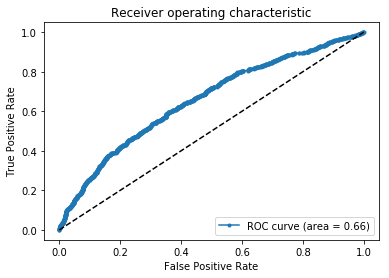

In [5]:

plt.subplot(2, 1, 1)


# Create linear regression object
alphas = np.logspace(-3,1,1000)

scores = []
# Generate ROC  for LR with l2 penalty and C=alpha
for alpha in alphas:
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,LogisticRegression,C=alpha,penalty='l2')
    scores.append(roc_auc)
#plt.plot(alphas,scores)
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

In [6]:
best_alpha=alphas[np.argmax(scores)]
best_alpha

0.22199661191199549

Area under the ROC curve : 0.611906


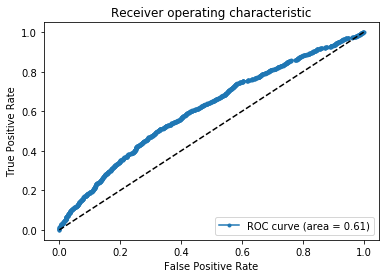

In [7]:
best_alpha=alphas[np.argmax(scores)]
# Generate ROC  for LR with l1 penalty and C=best_alpha
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=best_alpha,penalty='l2')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

In [8]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)
regr2 = LogisticRegression(C=best_alpha,penalty='l2')
regr2.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(regr2, X_train, y_train, cv=5, scoring = "roc_auc")
scores2

array([ 0.59277786,  0.58360588,  0.66520384,  0.60548102,  0.67914124])